In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import h5py
from datetime import datetime, timedelta
from sklearn.cluster import KMeans

import sys
import os
from pathlib import Path

scripts_dir = Path().resolve()
parent_dir = scripts_dir.parent.parent/'aeon_mecha'
sys.path.insert(0, str(parent_dir))

import aeon
import aeon.io.api as api
from aeon.io import reader, video
from aeon.schema.dataset import exp02, exp01
from aeon.schema.schemas import social02
from aeon.analysis.utils import visits, distancetravelled

In [10]:
!ls /ceph/aeon/aeon/data/raw/AEON3/social0.2

2024-01-31T11-28-39  2024-02-08T15-03-42  2024-05-23T08-26-29
2024-02-01T22-36-47  2024-02-09T16-07-32  2024-05-23T14-22-53
2024-02-02T00-08-55  2024-02-15T17-03-12  2024-05-29T13-47-00
2024-02-02T00-15-00  2024-02-25T17-22-33  2024-05-29T14-51-06
2024-02-03T16-52-29  2024-02-28T13-54-17  2024-05-31T13-13-32
2024-02-05T15-43-07  2024-03-01T16-40-40  2024-05-31T14-14-47
2024-02-08T14-54-25  2024-03-01T16-46-12
2024-02-08T14-55-21  2024-05-08T16-53-36


In [75]:
root = [Path("/ceph/aeon/aeon/data/raw/AEON3/experiment0.3")]
Exp02Summary = api.load(root, exp02.Metadata).metadata[0].toDict()

In [2]:
roots = [Path("/ceph/aeon/aeon/code/scratchpad/sleap/multi_point_tracking/multi_animal_CameraTop/predictions_social02/AEON3/analyses"),Path("/ceph/aeon/aeon/code/scratchpad/sleap/multi_point_tracking/multi_animal_CameraTop/predictions_social02/AEON4/analyses")]
if not np.all([path.exists() for path in roots]):
    print("Cannot find root paths. Check path names or connection.")

# Use AEON api

In [ ]:
from dotmap import DotMap
def find_obj(dotmap, obj):
    """Returns a list of objects of type `obj` found in a DotMap."""
    objs = []
    for value in dotmap.values():
        if isinstance(value, obj):
            objs.append(value)
        elif isinstance(value, DotMap):
            objs.extend(find_obj(value, obj))
    return objs

root = [Path("/ceph/aeon/aeon/data/raw/AEON3/social0.2")]

mouse_pos = pd.read_parquet('../SocialData/HMMData/' + 'Pre' + "_" + 'BAA-1104045' + '.parquet', engine='pyarrow')
start_time, end_time = mouse_pos.index[0], mouse_pos.index[-1]
readers = find_obj(social02, reader.Reader)

for r in readers:
    if r.pattern != 'Patch1_32_*': continue
    data = aeon.load(root, r, start=start_time, end=end_time)
    print(r.pattern)
    display(data.head())

In [ ]:
start, end = pd.Timestamp("2024-02-05 15:45:46.780000"), pd.Timestamp("2024-02-05 15:45:46.880000")
root = '/ceph/aeon/aeon/data/raw/AEON3/social0.2/'
video_metadata = aeon.load(root, social02.CameraTop.Video, start=start, end=end)
video_metadata.index = video_metadata.index.round("20L")  # round timestamps to nearest 20 ms
frames = video.frames(video_metadata)  # get actual frames based on vid metadata
first_frame = next(frames)
cv2.imwrite("first_frame.jpg", first_frame)

True

# Load SLEAP Files

In [ ]:
roots = [Path("/ceph/aeon/aeon/code/scratchpad/sleap/multi_point_tracking/multi_animal_CameraTop/predictions_social02/AEON3/analyses"),Path("/ceph/aeon/aeon/code/scratchpad/sleap/multi_point_tracking/multi_animal_CameraTop/predictions_social02/AEON4/analyses")]
if not np.all([path.exists() for path in roots]):
    print("Cannot find root paths. Check path names or connection.")

# Define the root path
root = Path("/ceph/aeon/aeon/code/scratchpad/sleap/multi_point_tracking/multi_animal_CameraTop/predictions_social02/AEON3/analyses")

# List all files in the directory
files = list(root.glob("*"))

# Print the list of files
'''for file in files:
    print(file)'''
    
from datetime import datetime

# Extract datetimes and create list of tuples
file_dates = []
for file in files:
    datetime_str = str(file).split('/')[-1].split('_')[1] 
    datetime_obj = datetime.strptime(datetime_str, '%Y-%m-%dT%H-%M-%S')
    file_dates.append((datetime_obj, file))

# Sort the list of tuples by the datetime
file_dates.sort()

# Extract the sorted paths
sorted_paths = [path for _, path in file_dates] 

import h5py
with h5py.File("/ceph/aeon/aeon/code/scratchpad/sleap/multi_point_tracking/multi_animal_CameraTop/predictions_social02/AEON3/analyses/CameraTop_2024-01-31T11-00-00_full_pose.analysis.h5", 'r') as f:
    occupancy_matrix = f['track_occupancy'][:]
    tracks_matrix = f['tracks'][:]
    point_scores = f['point_scores'][:]
    nodes_name = f['node_names'][:]

print(occupancy_matrix.shape)
print(tracks_matrix.shape)

542.0682163238525

# AEON3

In [2]:
# Define the root path
root = Path("/ceph/aeon/aeon/code/scratchpad/sleap/multi_point_tracking/multi_animal_CameraTop/predictions_social02/AEON3/analyses")

# List all files in the directory
files = list(root.glob("*"))

# Extract datetimes and create list of tuples
file_dates = []
for file in files:
    datetime_str = str(file).split('/')[-1].split('_')[1] 
    datetime_obj = datetime.strptime(datetime_str, '%Y-%m-%dT%H-%M-%S')
    file_dates.append((datetime_obj, file))

# Sort the list of tuples by the datetime
file_dates.sort()

for file_date in file_dates:
    print(file_date[0])

2024-01-31 11:00:00
2024-01-31 12:00:00
2024-01-31 13:00:00
2024-01-31 14:00:00
2024-01-31 15:00:00
2024-01-31 16:00:00
2024-01-31 17:00:00
2024-01-31 18:00:00
2024-01-31 19:00:00
2024-01-31 20:00:00
2024-01-31 21:00:00
2024-01-31 22:00:00
2024-01-31 23:00:00
2024-02-01 00:00:00
2024-02-01 01:00:00
2024-02-01 02:00:00
2024-02-01 03:00:00
2024-02-01 04:00:00
2024-02-01 05:00:00
2024-02-01 06:00:00
2024-02-01 07:00:00
2024-02-01 08:00:00
2024-02-01 09:00:00
2024-02-01 10:00:00
2024-02-01 11:00:00
2024-02-01 12:00:00
2024-02-01 13:00:00
2024-02-01 14:00:00
2024-02-01 15:00:00
2024-02-01 16:00:00
2024-02-01 17:00:00
2024-02-01 18:00:00
2024-02-01 19:00:00
2024-02-01 20:00:00
2024-02-01 22:00:00
2024-02-01 23:00:00
2024-02-02 00:00:00
2024-02-02 01:00:00
2024-02-02 02:00:00
2024-02-02 03:00:00
2024-02-02 04:00:00
2024-02-02 05:00:00
2024-02-02 06:00:00
2024-02-02 07:00:00
2024-02-02 08:00:00
2024-02-02 09:00:00
2024-02-02 10:00:00
2024-02-02 11:00:00
2024-02-02 12:00:00
2024-02-02 13:00:00


In [3]:
data = {
    "Type": ["Pre", "Pre", "Pre", "Pre", "Post", "Post", "Post"],
    "Mouse": ["BAA-1104045", "BAA-1104045", "BAA-1104045", "BAA-1104047","BAA-1104045", "BAA-1104047", "BAA-1104047"],
    "Start": ["2024-01-31T11-28-39", "2024-02-01T22-36-47", "2024-02-02T00-15-00", "2024-02-05T15-43-07", "2024-02-25T17-22-33", "2024-02-28T13-54-17", "2024-03-01T16-46-12"],
    "End": ["2024-02-01T20-00-00", "2024-02-01T23-00-00", "2024-02-03T16-00-00", "2024-02-08T14-00-00", "2024-02-28T12-00-00", "2024-03-01T15-00-00", "2024-03-02T15-00-00"]
}

# Create a pandas dataframe
INFO = pd.DataFrame(data)
INFO.to_parquet('../SocialData/INFO3.parquet', engine='pyarrow')
display(INFO)

,Type,Mouse,Start,End
0,Pre,BAA-1104045,2024-01-31T11-28-39,2024-02-01T20-00-00
1,Pre,BAA-1104045,2024-02-01T22-36-47,2024-02-01T23-00-00
2,Pre,BAA-1104045,2024-02-02T00-15-00,2024-02-03T16-00-00
3,Pre,BAA-1104047,2024-02-05T15-43-07,2024-02-08T14-00-00
4,Post,BAA-1104045,2024-02-25T17-22-33,2024-02-28T12-00-00
5,Post,BAA-1104047,2024-02-28T13-54-17,2024-03-01T15-00-00
6,Post,BAA-1104047,2024-03-01T16-46-12,2024-03-02T15-00-00


## Arena Info

In [2]:
x = pd.read_parquet('../SocialData/RawData/' + '2024-02-05T15-43-07' + '_x.parquet', engine='pyarrow')
y = pd.read_parquet('../SocialData/RawData/' + '2024-02-05T15-43-07' + '_y.parquet', engine='pyarrow')
nodes_name = ['nose', 'head', 'right_ear', 'left_ear', 'spine1', 'spine2','spine3', 'spine4']
maxx = 0
maxy = 0
minx = 3000
miny = 3000
for node in nodes_name:
    maxx = max(max(x[::100][node]), maxx)
    maxy = max(max(y[::100][node]), maxy)
    minx = min(min(x[::100][node]), minx)
    miny = min(min(y[::100][node]), miny)
    
r = (maxy-miny)/2
ox = minx + r
oy = maxy - r

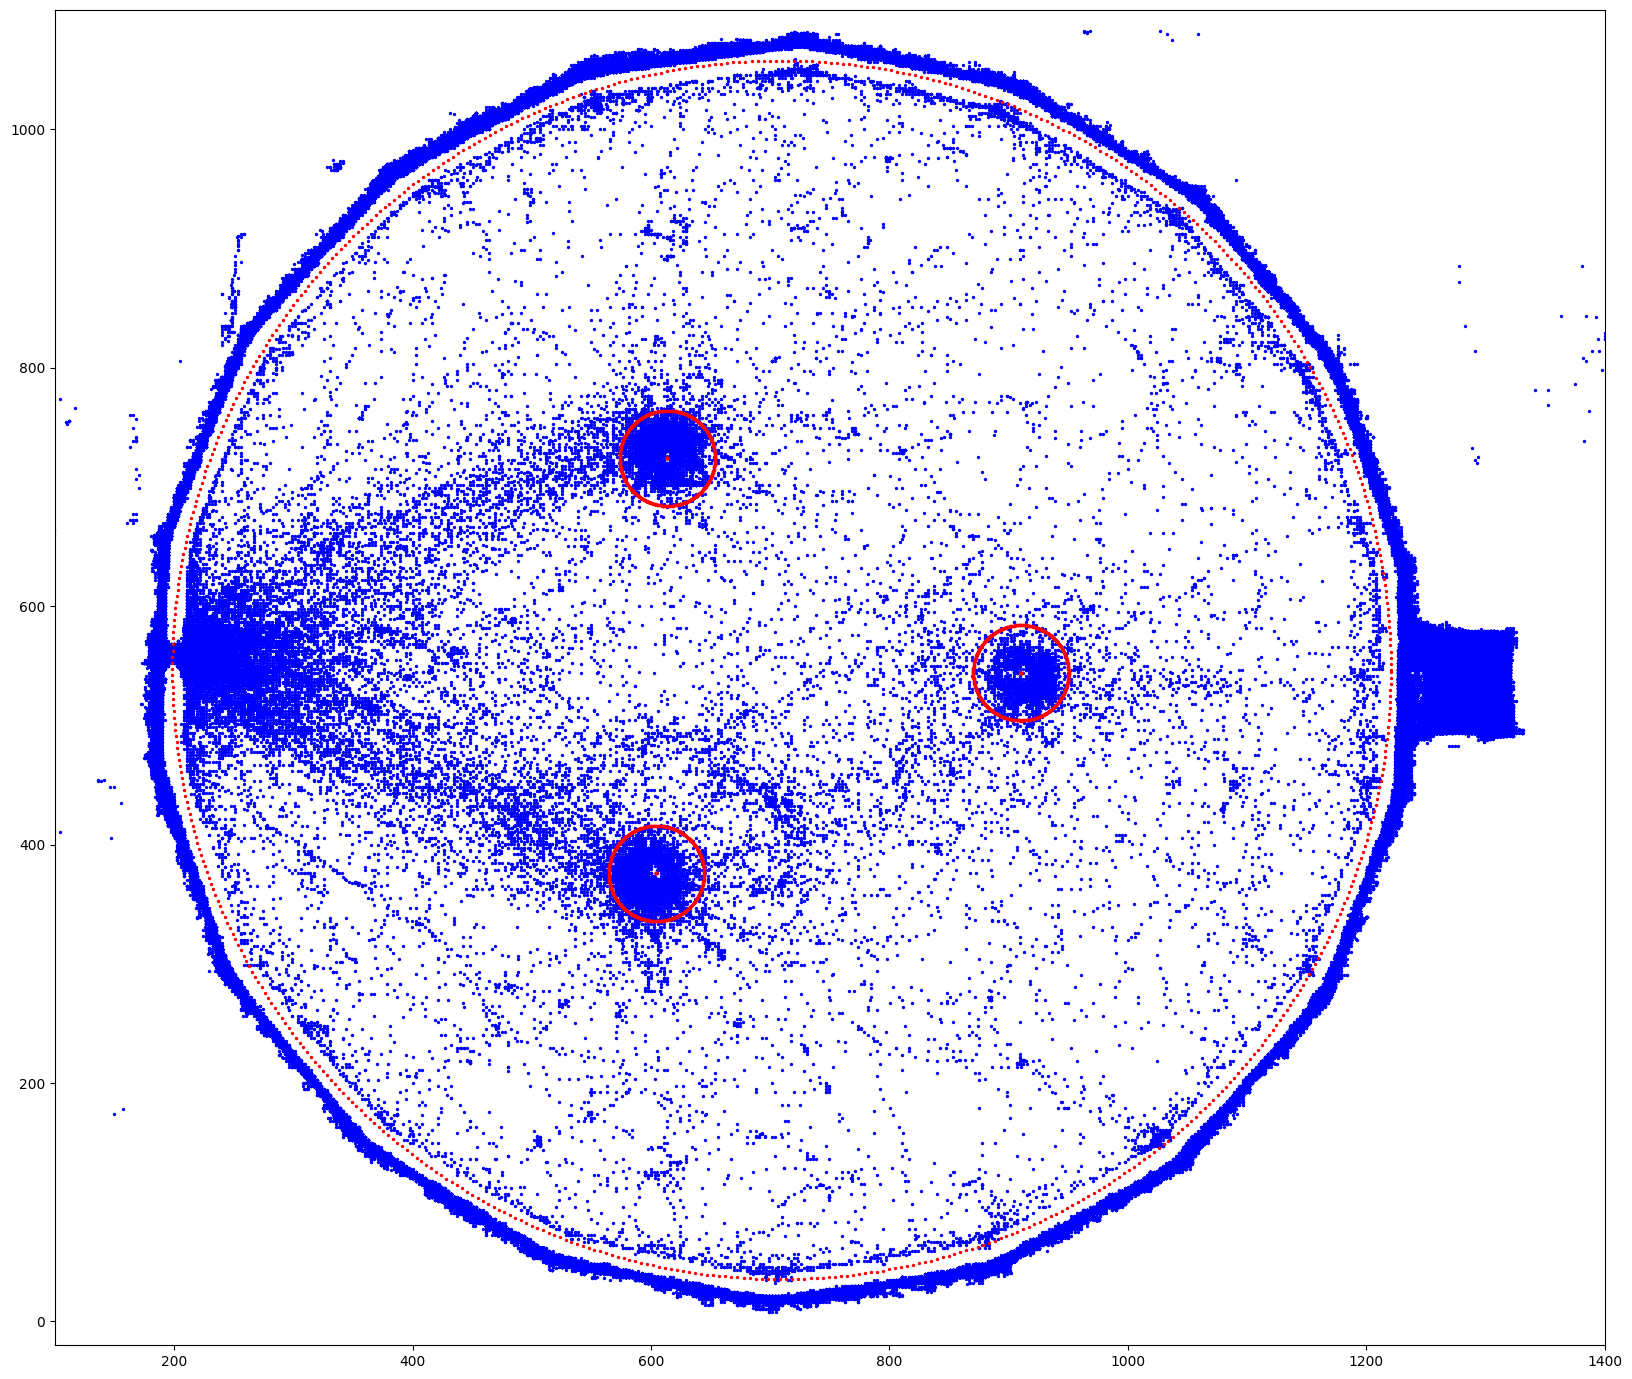

In [7]:
r = 511
r_ = 40
fig, axs = plt.subplots(1,1,figsize = (20,20))
axs.scatter(x['spine2'], y['spine2'], color = 'blue', s = 2)
axs.scatter(ox+np.cos(np.arange(0, 2*np.pi, 0.01))*r, oy+np.sin(np.arange(0, 2*np.pi, 0.01))*r, color = 'red', s = 2)

[910.25, 544],[613.75, 724],[604.5, 375.75]
axs.scatter(910.25, 544, color = 'red', s = 5)
axs.scatter(910.25+np.cos(np.arange(0, 2*np.pi, 0.01))*r_, 544+np.sin(np.arange(0, 2*np.pi, 0.01))*r_, color = 'red', s = 2)
axs.scatter(613.75, 724, color = 'red', s = 5)
axs.scatter(613.75+np.cos(np.arange(0, 2*np.pi, 0.01))*r_, 724+np.sin(np.arange(0, 2*np.pi, 0.01))*r_, color = 'red', s = 2)
axs.scatter(604.5, 375.75, color = 'red', s = 5)
axs.scatter(604.5+np.cos(np.arange(0, 2*np.pi, 0.01))*r_, 375.75+np.sin(np.arange(0, 2*np.pi, 0.01))*r_, color = 'red', s = 2)
axs.set_aspect('equal')
axs.set_xlim((100,1400))
axs.set_ylim((-20,1100))
plt.show()
            

## Patch Info

In [4]:
root = '/ceph/aeon/aeon/data/raw/AEON3/social0.2/'
start_time = pd.Timestamp('2024-02-09 16:07:32')
end_time = pd.Timestamp('2024-02-09 19:00:00')
metadata = aeon.load(
    root, social02.Metadata, start=start_time, end=end_time
)["metadata"].iloc[0]
patch_loc = [(int(point.X), int(point.Y)) for point in metadata.ActiveRegion.Patch1Region.ArrayOfPoint]
print(np.mean(patch_loc, axis = 0))
patch_loc = [(int(point.X), int(point.Y)) for point in metadata.ActiveRegion.Patch2Region.ArrayOfPoint]
print(np.mean(patch_loc, axis = 0))
patch_loc = [(int(point.X), int(point.Y)) for point in metadata.ActiveRegion.Patch3Region.ArrayOfPoint]
print(np.mean(patch_loc, axis = 0))

DotMap(NestRegion=DotMap(ArrayOfPoint=[DotMap(X='1321', Y='486'), DotMap(X='1231', Y='485'), DotMap(X='1231', Y='591'), DotMap(X='1323', Y='583')]), Patch1Region=DotMap(ArrayOfPoint=[DotMap(X='899', Y='535'), DotMap(X='922', Y='533'), DotMap(X='921', Y='554'), DotMap(X='899', Y='554')]), Patch2Region=DotMap(ArrayOfPoint=[DotMap(X='610', Y='709'), DotMap(X='628', Y='718'), DotMap(X='617', Y='739'), DotMap(X='600', Y='730')]), Patch3Region=DotMap(ArrayOfPoint=[DotMap(X='590', Y='371'), DotMap(X='608', Y='360'), DotMap(X='619', Y='380'), DotMap(X='601', Y='392')]), ArenaCenter=DotMap(X='708', Y='543'), ArenaInnerRadius='505', ArenaOuterRadius='531', Type='ActiveRegion', _ipython_display_=DotMap(), _repr_mimebundle_=DotMap())

# AEON4

In [7]:
# Define the root path
root = Path("/ceph/aeon/aeon/code/scratchpad/sleap/multi_point_tracking/multi_animal_CameraTop/predictions_social02/AEON4/analyses")

# List all files in the directory
files = list(root.glob("*"))

# Extract datetimes and create list of tuples
file_dates = []
for file in files:
    datetime_str = str(file).split('/')[-1].split('_')[1] 
    datetime_obj = datetime.strptime(datetime_str, '%Y-%m-%dT%H-%M-%S')
    file_dates.append((datetime_obj, file))

# Sort the list of tuples by the datetime
file_dates.sort()

for file_date in file_dates:
    print(file_date[0])

2024-01-31 10:00:00
2024-01-31 11:00:00
2024-01-31 12:00:00
2024-01-31 13:00:00
2024-01-31 14:00:00
2024-01-31 15:00:00
2024-01-31 16:00:00
2024-01-31 17:00:00
2024-01-31 18:00:00
2024-01-31 19:00:00
2024-01-31 20:00:00
2024-01-31 21:00:00
2024-01-31 22:00:00
2024-01-31 23:00:00
2024-02-01 00:00:00
2024-02-01 01:00:00
2024-02-01 02:00:00
2024-02-01 03:00:00
2024-02-01 04:00:00
2024-02-01 05:00:00
2024-02-01 06:00:00
2024-02-01 07:00:00
2024-02-01 08:00:00
2024-02-01 09:00:00
2024-02-01 10:00:00
2024-02-01 11:00:00
2024-02-01 12:00:00
2024-02-01 13:00:00
2024-02-01 14:00:00
2024-02-01 15:00:00
2024-02-01 16:00:00
2024-02-01 17:00:00
2024-02-01 18:00:00
2024-02-01 19:00:00
2024-02-01 20:00:00
2024-02-01 21:00:00
2024-02-01 22:00:00
2024-02-01 23:00:00
2024-02-02 00:00:00
2024-02-02 01:00:00
2024-02-02 02:00:00
2024-02-02 03:00:00
2024-02-02 04:00:00
2024-02-02 05:00:00
2024-02-02 06:00:00
2024-02-02 07:00:00
2024-02-02 08:00:00
2024-02-02 09:00:00
2024-02-02 10:00:00
2024-02-02 11:00:00


In [11]:
data = {
    "Type": ["Pre", "Pre", "Pre", "Pre", "Post", "Post"],
    "Mouse": ["BAA-1104048", "BAA-1104048", "BAA-1104048", "BAA-1104049","BAA-1104048", "BAA-1104049"],
    "Start": ["2024-01-31T10-14-14", "2024-02-01T20-46-44", "2024-02-01T23-40-29", "2024-02-05T14-36-00", "2024-02-25T17-24-32", "2024-02-28T13-45-06"],
    "End": ["2024-02-01T19-00-00", "2024-02-01T22-00-00", "2024-02-03T16-00-00", "2024-02-08T14-00-00", "2024-02-28T12-00-00", "2024-03-02T15-00-00"]
}

# Create a pandas dataframe
INFO = pd.DataFrame(data)
INFO.to_parquet('../SocialData/INFO4.parquet', engine='pyarrow')
display(INFO)

,Type,Mouse,Start,End
0,Pre,BAA-1104048,2024-01-31T10-14-14,2024-02-01T19-00-00
1,Pre,BAA-1104048,2024-02-01T20-46-44,2024-02-01T22-00-00
2,Pre,BAA-1104048,2024-02-01T23-40-29,2024-02-03T16-00-00
3,Pre,BAA-1104049,2024-02-05T14-36-00,2024-02-08T14-00-00
4,Post,BAA-1104048,2024-02-25T17-24-32,2024-02-28T12-00-00
5,Post,BAA-1104049,2024-02-28T13-45-06,2024-03-02T15-00-00
